<a href="https://colab.research.google.com/github/Shankeerthan101297/The_Tyrants_Datathon2020/blob/main/Covid19_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df_confirmed = pd.read_csv('/content/Covid19_SL.csv')
df_confirmed.head()

,DATE,COLOMBO,GAMPAHA,PUTTALAM,KALUTARA,ANURADHAPURA,KANDY,KURUNEGALA,POLONNARUWA,JAFFNA,RATNAPURA,KEGALLE,MONERAGALA,KALMUNAI,MATALE,GALLE,AMPARA,BADULLA,MATARA,BATTICOLOA,HAMBANTOTA,VAVUNIA,TRINCOMALEE,NUWARAELIYA,KILINOCHCHI,MANNAR,MULLATIVU,FOREIGNERS,NAVY,OTHER FORCERS,KANDAKADU,WELIKADA,MINUWANGODA,TOTAL
0,10/1/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,10/2/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10/3/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
3,10/4/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,10/5/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,70,74


In [4]:
import plotly.graph_objects as go
fig = go.Figure()
#Plotting datewise confirmed cases
#fig.add_trace(go.Scatter(x=df_confirmed['DATE'], y=df_confirmed['WELIKADA'], mode='lines+markers', name='WELIKADA',line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=df_confirmed['DATE'], y=df_confirmed['MINUWANGODA'], mode='lines+markers', name='MINUWANGODA',line=dict(color='blue', width=2)))

fig.update_layout(title='Covid-19 cases in Sri Lanka', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [39]:
from fbprophet import Prophet

min_confirmed= df_confirmed.loc[0:30,['DATE','MINUWANGODA']]
min_confirmed.columns = ['ds','y']
min_confirmed['ds'] = pd.to_datetime(min_confirmed['ds'])
min_confirmed.tail()

,ds,y
26,2020-10-27,541
27,2020-10-28,457
28,2020-10-29,335
29,2020-10-30,582
30,2020-10-31,633


In [49]:
model = Prophet(interval_width=0.8)
model.fit(min_confirmed)
min_future = model.make_future_dataframe(periods=5)

min_forecast = model.predict(min_future)
min_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper
31,2020-11-01,420.693455,232.682127,616.313254
32,2020-11-02,435.952692,238.344058,629.809250
33,2020-11-03,521.651970,309.031877,713.333878
34,2020-11-04,594.569897,414.182646,780.987145
35,2020-11-05,499.682669,311.843054,710.767945


In [51]:
from sklearn.metrics import mean_squared_error 
realVals = min_confirmed.y
predictedVals = min_forecast.yhat[0:31]
mse = mean_squared_error(realVals, predictedVals)
mse

22659.562226886563

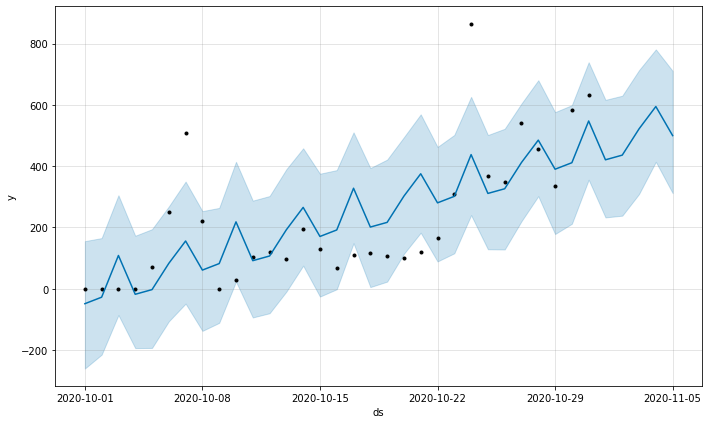

In [52]:
min_confirmed_forecast_plot = model.plot(min_forecast)

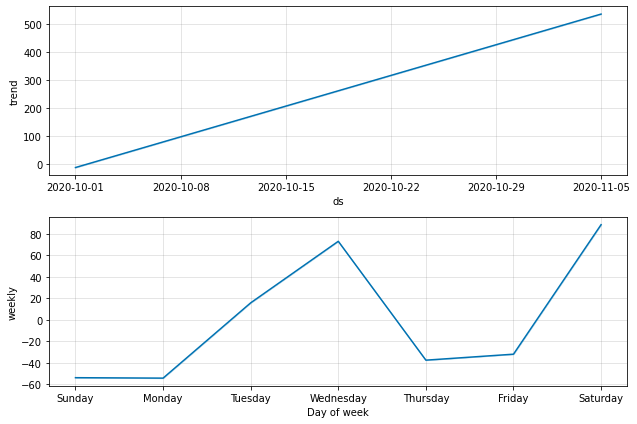

In [53]:
min_confirmed_forecast_plot =model.plot_components(min_forecast)